In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO
import requests
import seaborn as sns
# Run in python console
import nltk; nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer # load nltk's SnowballStemmer as variabled 'stemmer'
# Run in terminal or command prompt
!python3 -m spacy download en
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools

import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
def make_confusion_matrix(cf,
                          y_pred,
                          y_true,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            MCC=sklearn.metrics.matthews_corrcoef(y_true, y_pred, sample_weight=None)
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\nMCC={:0.3f}".format(
                accuracy,precision,recall,f1_score,MCC)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import random
import missingno
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, recall_score, f1_score, plot_confusion_matrix

from wordcloud import WordCloud

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'via','im','us','you','we','they'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth #You may upload files to your drive and give authentication in order to read the csv.I read files from drive without any problem. 
from pydrive.drive import GoogleDrive #I hope when you run them for grading purpose you won't encounter any problem
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

In [ ]:
data_downloaded = drive.CreateFile({'id': '1Vcfg0b7C6mViMl-MbTK-KTqCIwk_mKRS'})
data_downloaded.GetContentFile('NewsReal1.rar')

data_downloaded = drive.CreateFile({'id': '1RK9hhhLN--1CYP_SwlExC9n76yfdQqFP'})
data_downloaded.GetContentFile('NewsReal2.rar')

data_downloaded = drive.CreateFile({'id': '1oB4EhHx0g6-_L-moc4m7c7GKL9XOiXFf'})
data_downloaded.GetContentFile('NewsFake.rar')

KeyboardInterrupt: ignored

In [ ]:
!unrar x "/content/NewsReal1.rar" "/content/NewsReal1/"

!unrar x "/content/NewsReal2.rar" "/content/NewsReal2/"

!unrar x "/content/NewsFake.rar" "/content/NewsFake/"

In [ ]:
import glob
import sys
sys.path.insert(0, "../")

root_path = '/content/'

all_txt = glob.glob(f'{root_path}/***/**/*.txt', recursive=True)

In [ ]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = np.loadtxt(file,delimiter='\n',dtype=str)
            self.text = []
            try:
              for entry in content:
                    self.text.append(entry)
            except Exception as e:
               # if only one author - or Null valie
               self.text.append('')
    def __repr__(self):
        return f'{self.text}'
first_row = FileReader(all_txt[4])
print(first_row)

['\ufeffVitamin C Protects Against Coronavirus January 27, 2020 \xa0Print This Post Vitamin C Protects Against Coronavirus by Andrew W. Saul, Editor Orthomolecular Medicine News Service FOR IMMEDIATE RELEASE (OMNS January 26, 2020) The coronavirus pandemic can be dramatically slowed, or stopped, with the immediate widespread use of high doses of vitamin C. Physicians have demonstrated the powerful antiviral action of vitamin C for decades. There has been a lack of media coverage of this effective and successful approach against viruses in general, and coronavirus in particular. It is very important to maximize the body’s anti-oxidative capacity and natural immunity to prevent and minimize symptoms when a virus attacks the human body. The host environment is crucial. Preventing is obviously easier than treating severe illness. But treat serious illness seriously. Do not hesitate to seek medical attention. It is not an either-or choice. Vitamin C can be used right along with medicines wh

In [ ]:
dict_ = {'dataset':[],'news_idx':[],'text': []}
with open('output1.txt', 'w') as outfile: 
  for idx, entry in enumerate(all_txt):
    if idx % (len(all_txt) // 10) == 0:   #if idx % (len(all_json[1:29316]) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_txt)}')
    if all_txt[idx].find('nr')>0:
      index=all_txt[idx][all_txt[idx].find('nr')+2:].replace('.txt','')
      dataset=all_txt[idx][all_txt[idx].find('News'):18]
    else:
      index=all_txt[idx][all_txt[idx].find('nf')+2:].replace('.txt','')
      dataset=all_txt[idx][all_txt[idx].find('News'):17]
    content = FileReader(entry)
    if len(str(content)) == 4 or len(str(content)) == 2:
        continue
    if str(content).find('%PDF-')>0:
        continue
    #print(str(content).replace("['",'').replace('"]','').replace['["',''].replace("\\ufeff",''))
    
    dict_['text'].append(str(content).replace("['",'').replace('"]','').replace('["','').replace('\\t','').replace("\\ufeff",''))
    dict_['news_idx'].append(index)
    dict_['dataset'].append(dataset)
    
df_covid = pd.DataFrame(dict_, columns=['dataset','news_idx','text'])
df_covid.head(10)

Processing index: 0 of 22136
Processing index: 2213 of 22136
Processing index: 4426 of 22136
Processing index: 6639 of 22136
Processing index: 8852 of 22136
Processing index: 11065 of 22136
Processing index: 13278 of 22136
Processing index: 15491 of 22136
Processing index: 17704 of 22136
Processing index: 19917 of 22136
Processing index: 22130 of 22136


,dataset,news_idx,text
0,NewsFake,576,The CDC Confesses to Lying About COVID-19 Deat...
1,NewsFake,317,Vitamin C Protects Against Coronavirus January...
2,NewsFake,579,The CDC Confesses to Lying About COVID-19 Deat...
3,NewsFake,223,Coronavirus Bioweapon - How China Stole Corona...
4,NewsFake,941,"Apparently, 'Woke' Can't Take A Joke: Monty Py..."
5,NewsFake,182,"CORONAVIRUS: Reports of 10,000 DEAD in Wuhan, ..."
6,NewsFake,1157,RevolutionRadio.org | Your Weapon of Mass Dest...
7,NewsFake,179,"CORONAVIRUS: Reports of 10,000 DEAD in Wuhan, ..."
8,NewsFake,327,Share Tweet Share Share Share This article may...
9,NewsFake,490,The CDC Confesses to Lying About COVID-19 Deat...


In [ ]:
df_covid=df_covid.groupby(["text"], sort=False, as_index=False).first()
df_covid.query('text.str.contains("Bioweapon ")', engine='python')

,text,dataset,news_idx
2,Coronavirus Bioweapon - How China Stole Corona...,NewsFake,223
25,MoA - Novel Coronavirus Defies Conspiracy Theo...,NewsFake,1524
41,"Coronavirus Contains “HIV Insertions”, Stoking...",NewsFake,1517
45,"Coronavirus Contains “HIV Insertions”, Stoking...",NewsFake,1500
72,Visualizing The Secret History Of Coronavirus ...,NewsFake,205
92,Alétheia News — Coronavirus Bioweapon - How Ch...,NewsFake,204


In [ ]:
data_downloaded = drive.CreateFile({'id': '140RYjYXx4Kdc03BbdEf-31zOjqELjxd6'})
data_downloaded.GetContentFile('HealthClaims_seperated.xlsx')

#data_downloaded = drive.CreateFile({'id': '1-QtEM3fARilsyAGznb1Fs6D9Q6_gcdw6'})
#data_downloaded.GetContentFile('NewsRealCOVID-19Tweets_3.csv')

data_downloaded = drive.CreateFile({'id': '1mP6Kd-MwutR2NS4tobU0GIPoXuW_MZrE'})
data_downloaded.GetContentFile('NewsRealCOVID-19Tweets_all.csv')

data_downloaded = drive.CreateFile({'id': '1aWraihq5v_CZLx34gqxhd2tgxElhW4fe'})
data_downloaded.GetContentFile('ClaimFakeCOVID-19Tweets_all.csv')

data_downloaded = drive.CreateFile({'id': '1asDMBNfDBk6OIN6Dvx0Q7J1RiQEizE3w'})
data_downloaded.GetContentFile('ClaimRealCOVID-19Tweets_all.csv')

data_downloaded = drive.CreateFile({'id': '1dkJXKroA0HAEIjoLKD_g9mSrGAGFiEvg'})
data_downloaded.GetContentFile('FakeCOVID19.csv')

data_downloaded = drive.CreateFile({'id': '1C9sWAwr_tZwLzGTbHysGkXj_yC0WJohA'})
data_downloaded.GetContentFile('NewsFakeCOVID-19Tweets_all.csv')

In [ ]:
HealthClaims_seperated = pd.read_excel('HealthClaims_seperated.xlsx')
#NewsRealCOVIDTweets_3 = pd.read_csv('NewsRealCOVID-19Tweets_3.csv',header=None)
#NewsRealCOVIDTweets_2 = pd.read_csv('NewsRealCOVID-19Tweets_2.csv',header=None)
NewsRealCOVIDTweets = pd.read_csv('NewsRealCOVID-19Tweets_all.csv',header=None)
ClaimFakeCOVIDTweets = pd.read_csv('ClaimFakeCOVID-19Tweets_all.csv',header=None)
ClaimRealCOVIDTweets = pd.read_csv('ClaimRealCOVID-19Tweets_all.csv',header=None)
FakeCOVID19ClaimsTweets = pd.read_csv('FakeCOVID19.csv',header=None)
NewsFakeCOVIDTweets = pd.read_csv('NewsFakeCOVID-19Tweets_all.csv',header=None)

##Haberler üzerinden yapılacak ise

In [ ]:
HealthClaims_seperated['dataset']='SnopeManual'
df_covid['TRUTH']=bool
df_covid['TRUTH'][df_covid.dataset=='NewsFake']=False
df_covid['TRUTH'][df_covid.dataset=='NewsReal1']=True
df_covid['TRUTH'][df_covid.dataset=='NewsReal2']=True

In [ ]:
HealthClaims_seperated = HealthClaims_seperated.rename(columns = {'FULL NEWS': 'text'}, inplace = False)
HealthClaims_seperated=HealthClaims_seperated.drop('CLAIM',1)
HealthClaims_seperated=HealthClaims_seperated.drop('SNOPE_ARTICLE',1)

In [ ]:
df_covid=df_covid.drop('news_idx',1)
HealthClaims_seperated=HealthClaims_seperated[['text','dataset','TRUTH']]
train_df=pd.concat([HealthClaims_seperated,df_covid],ignore_index=True)
train_df = train_df.rename(columns = {'text': 'FULL_NEWS'}, inplace = False)

# Haberler üzerinden yapılacak ise sonu

In [ ]:
pd.set_option("display.max_colwidth", 100)



```
# distinct alırken link üzerinden mi tweet üzerinden mi distinct alınmalı? ona göre bu kodu çalıştır
NewsReal1=df_covid[df_covid.dataset=='NewsReal1'].reset_index(drop=True)
NewsReal2=df_covid[df_covid.dataset=='NewsReal2'].reset_index(drop=True)
NewsReal1.news_idx=NewsReal1.news_idx.apply(pd.to_numeric) 
NewsReal2.news_idx=NewsReal2.news_idx.apply(pd.to_numeric) 

NewsRealCOVIDTweets=NewsRealCOVIDTweets.groupby(2, sort=False, as_index=False).first()
NewsRealCOVIDTweets_2=NewsRealCOVIDTweets_2.groupby(2, sort=False, as_index=False).first()
NewsRealCOVIDTweets["news_idx"] = NewsRealCOVIDTweets.index + 1
NewsRealCOVIDTweets_2["news_idx"] = NewsRealCOVIDTweets_2.index + 1
pd.merge(NewsRealCOVIDTweets,
                 NewsReal1,
                 on='news_idx', 
                 how='left')[pd.merge(NewsRealCOVIDTweets,
                 NewsReal1,
                 on='news_idx', 
                 how='left').news_idx==4317]
```



In [ ]:
ClaimFakeCOVIDTweets = ClaimFakeCOVIDTweets.rename(columns = {0: 'ID', 1: 'FULL_NEWS', 2: 'DATE', 3:'LANG',4: 'INDEX'}, inplace = False)
ClaimFakeCOVIDTweets['TRUTH']=False
ClaimFakeCOVIDTweets['DATASET']='CLAIM'
ClaimRealCOVIDTweets = ClaimRealCOVIDTweets.rename(columns = {0: 'ID', 1: 'FULL_NEWS', 2: 'DATE', 3:'LANG',4:'INDEX'}, inplace = False)
ClaimRealCOVIDTweets['TRUTH']=True
ClaimRealCOVIDTweets['DATASET']='CLAIM'
FakeCOVID19ClaimsTweets = FakeCOVID19ClaimsTweets.rename(columns = {0: 'ID', 1: 'FULL_NEWS', 2: 'DATE', 3:'LANG',4:'INDEX'}, inplace = False)
FakeCOVID19ClaimsTweets['TRUTH']=False
FakeCOVID19ClaimsTweets['DATASET']='CLAIM'

In [ ]:
NewsFakeCOVIDTweets = NewsFakeCOVIDTweets.rename(columns = {0: 'ID', 1: 'FULL_NEWS', 2: 'DATE', 3:'LANG',4:'INDEX'}, inplace = False)
NewsFakeCOVIDTweets['TRUTH']=False
NewsFakeCOVIDTweets['DATASET']='NEWS'
NewsRealCOVIDTweets = NewsRealCOVIDTweets.rename(columns = {0: 'ID', 1: 'FULL_NEWS', 2: 'DATE', 3:'LANG',4:'INDEX'}, inplace = False)
NewsRealCOVIDTweets['TRUTH']=True
NewsRealCOVIDTweets['DATASET']='NEWS'

In [ ]:
train_df = pd.concat([ClaimRealCOVIDTweets,ClaimFakeCOVIDTweets,FakeCOVID19ClaimsTweets,NewsRealCOVIDTweets,NewsFakeCOVIDTweets],ignore_index=True)

In [ ]:
ClaimFakeCOVIDTweets[ClaimFakeCOVIDTweets.TRUTH==False]

,ID,FULL_NEWS,DATE,LANG,INDEX,TRUTH,DATASET
0,1.252630e+18,Can you tell fact from fiction?\n1. The immedi...,04.21.2020,en,100001,False,CLAIM
1,1.243970e+18,2. Only older adults and young people are at r...,03.28.2020,en,100001,False,CLAIM
2,1.242470e+18,2. Only older adults and young people are at r...,03.24.2020,en,100001,False,CLAIM
3,1.242460e+18,#Corona Myth &amp; Reality.\n\nMyth: Only olde...,03.24.2020,en,100001,False,CLAIM
4,1.242400e+18,SOME MYTHS ABOUT COVID-19\n 1. If you can hold...,03.24.2020,en,100001,False,CLAIM
...,...,...,...,...,...,...,...
431,1.263380e+18,@beverleyhb57 @janis_garbutt Can you catch cor...,05.21.2020,en,100027,False,CLAIM
432,1.262810e+18,Can you catch coronavirus in swimming pools or...,05.19.2020,en,100027,False,CLAIM
433,1.260100e+18,Can you catch coronavirus in swimming pools or...,05.12.2020,en,100027,False,CLAIM
434,1.257610e+18,Can you catch coronavirus in swimming pools or...,05.05.2020,en,100027,False,CLAIM


In [ ]:
# https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_newline(text):
    line = re.compile(r'\n')
    return line.sub(r' ',text)

def remove_mentions(text):
    mention=re.compile(r'@\w+')
    return mention.sub(r' ',text)

def remove_hashtag(text):
    hashtag=re.compile(r'#')
    return hashtag.sub(r'',text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_space(text):
    spc = re.compile(r'xa0')
    return spc.sub(r' ',text)    

def strip(text):
  text=text.strip()
  return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def find_hashtags(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", tweet)]) or 'no'

def find_mentions(tweet):
    return " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", tweet)]) or 'no'

def find_links(tweet):
    return " ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", tweet)]) or 'no'

In [ ]:
def process_text(df):   
    df['hashtags'] = df['FULL_NEWS'].apply(lambda x: find_hashtags(x))
    df['mentions'] = df['FULL_NEWS'].apply(lambda x: find_mentions(x))
    df['links'] = df['FULL_NEWS'].apply(lambda x: find_links(x))
    return df

train_df = process_text(train_df)

In [ ]:
for datas in [train_df]:
    datas['FULL_NEWS'] = datas['FULL_NEWS'].apply(lambda x : remove_url(x))
    datas['FULL_NEWS'] = datas['FULL_NEWS'].apply(lambda x : remove_html(x))
    datas['FULL_NEWS'] = datas['FULL_NEWS'].apply(lambda x : remove_emoji(x))
    datas['FULL_NEWS'] = datas['FULL_NEWS'].apply(lambda x : remove_newline(x))
    datas['FULL_NEWS'] = datas['FULL_NEWS'].apply(lambda x : remove_mentions(x))
    datas['FULL_NEWS'] = datas['FULL_NEWS'].apply(lambda x : remove_space(x))
    datas['FULL_NEWS'] = datas['FULL_NEWS'].apply(lambda x : remove_hashtag(x))
    datas['FULL_NEWS'] = datas['FULL_NEWS'].apply(lambda x : strip(x))
train_df.head()

,ID,FULL_NEWS,DATE,LANG,INDEX,TRUTH,DATASET,hashtags,mentions,links
0,1.253280e+18,How large does a meeting or event need to be i...,04.23.2020,en,100000,True,CLAIM,no,no,no
1,1.253970e+18,Does WHO recommend that all international mass...,04.25.2020,en,100001,True,CLAIM,no,Cordobesa2201 Rumpelstinski6 sanidadgob,no
2,1.253960e+18,Does WHO recommend that all international mass...,04.25.2020,en,100001,True,CLAIM,no,Cordobesa2201 Rumpelstinski6 sanidadgob,no
3,1.252580e+18,MASS GATHERING - Does WHO recommend that all i...,04.21.2020,en,100001,True,CLAIM,no,AngryDuck91,no
4,1.252580e+18,- Does WHO recommend that all international ma...,04.21.2020,en,100001,True,CLAIM,no,AngryDuck91,no


In [ ]:
train_df['DATE']=pd.to_datetime(train_df['DATE'], format='%m.%d.%Y') 
train_df=train_df.sort_values(by=['DATE'],ascending=True)
train_df=train_df.groupby(["FULL_NEWS"], sort=False, as_index=False).first()

In [ ]:
train_df=train_df[train_df.LANG=='en']
train_df=train_df[train_df.DATE> '2019-11-1'].reset_index()

In [ ]:
with open("train_df.csv", "w",encoding='utf-8-sig') as text_file:
    text_file.write(train_df.to_csv(index=False))

In [ ]:
from google.colab import files
files.download("train_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_data=train_df[train_df.DATE< '2020-6-1']
validate_data=train_df[train_df.DATE > '2020-6-1']

In [ ]:
train_data, validate_data = np.split(train_df, [int(.8*len(train_df))])

In [ ]:
#UnderSampling Yapılacaksa bu kodu çalıştır. Sampling strategyi de ayarla
!pip install imbalanced-learn
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
train_data,y=undersample.fit_resample(train_data, train_data['TRUTH'])



In [ ]:
train_data=pd.DataFrame(train_data)
train_data = train_data.rename(columns = { 1: 'FULL_NEWS', 2: 'ID', 3:'DATE',4:'LANG',5:'INDEX',6:'TRUTH',}, inplace = False)

In [ ]:
#train_data, validate_data, test_data = np.split(train_df.sample(frac=1,random_state=5), [int(.6*len(train_df)), int(.8*len(train_df))])
train_data, validate_data, test_data = np.split(train_df, [int(.6*len(train_df)), int(.8*len(train_df))])

train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

print("Size of training set: {}".format(len(train_data)))
print("Size of validation set: {}".format(len(validate_data)))
print("Size of testing set: {}".format(len(test_data)))

Size of training set: 3625
Size of validation set: 1208
Size of testing set: 1209


In [ ]:
#!cuda install -y pytorch torchvision cudatoolkit=10.1 -c pytorch
import torch
!pip install transformers

     |████████████████████████████████| 1.5MB 12.8MB/s 
     |████████████████████████████████| 2.9MB 66.7MB/s 
     |████████████████████████████████| 890kB 56.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=3b65f16a4ffb1bd471e71dd3e79057ea0f2f26b8f9290801a82b1442a56c678c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
#config=BertConfig()
#model = BertForSequenceClassification(config)
#tokenizer= BertTokenizer.from_pretrained('bert-large-cased-whole-word-masking')

In [ ]:
#from  transformers import BertModel, BertTokenizer, BertForSequenceClassification
#model = BertForSequenceClassification.from_pretrained('bert-large-uncased-whole-word-masking',num_labels=2,output_hidden_states=False )
#tokenizer= BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking')

from transformers import AutoTokenizer, AutoModel, AutoConfig, AutoModelForSequenceClassification

# Initialise a Model for Sequence Classification with 2 labels
config = AutoConfig.from_pretrained("digitalepidemiologylab/covid-twitter-bert-v2", num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained("digitalepidemiologylab/covid-twitter-bert-v2", config=config)
tokenizer = AutoTokenizer.from_pretrained("digitalepidemiologylab/covid-twitter-bert-v2")



Some weights of the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClass

In [ ]:
#from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


device = torch.device('cuda')

#tokenizer = BertTokenizer.from_pretrained("bert-large-uncased-whole-word-masking")
#model = BertForSequenceClassification.from_pretrained("bert-large-uncased-whole-word-masking")
#model.config.num_labels = 2



```
# Freeze the pre trained parameters
for param in model.parameters():
    param.requires_grad = False

# Add three new layers at the end of the network
model.classifier = nn.Sequential(
    nn.Linear(1024, 128),
    nn.LayerNorm(128),
    nn.ReLU(),
    nn.Linear(128, 2),
    nn.Softmax(dim=1)
)

model = model.to(device)```



In [ ]:
model = model.to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.Adam(model.classifier.parameters(), lr=2e-4)

In [ ]:
def preprocess_text(document):
    nWords = len(document.split())
    input_ids_all = tokenizer.encode(document,add_special_tokens=False)
    overlapFac = 1.1
    if len(input_ids_all)*overlapFac > 2048:
        nSearchWords = int(np.ceil(nWords/5))
        quarter = int(np.ceil(nWords/4))
        docSplit = document.split()
        docPieces = [' '.join(docSplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(docSplit[quarter-int(nSearchWords*overlapFac/2):quarter+int(quarter*overlapFac/2)]),
                     ' '.join(docSplit[quarter*2-int(nSearchWords*overlapFac/2):quarter*2+int(quarter*overlapFac/2)]),
                     ' '.join(docSplit[quarter*3-int(nSearchWords*overlapFac/2):quarter*3+int(quarter*overlapFac/2)]),
                     ' '.join(docSplit[-int(nSearchWords*overlapFac):])]
        input_ids = [tokenizer.encode(dp, return_tensors="pt",add_special_tokens=False).to(device) for dp in docPieces]        
        
    elif len(input_ids_all)*overlapFac > 1536:
        nSearchWords = int(np.ceil(nWords/4))
        third = int(np.ceil(nWords/3))
        docSplit = document.split()
        docPieces = [' '.join(docSplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(docSplit[third-int(nSearchWords*overlapFac/2):third+int(nSearchWords*overlapFac/2)]),
                     ' '.join(docSplit[third*2-int(nSearchWords*overlapFac/2):third*2+int(nSearchWords*overlapFac/2)]),
                     ' '.join(docSplit[-int(nSearchWords*overlapFac):])]
        input_ids = [tokenizer.encode(dp, return_tensors="pt",add_special_tokens=False).to(device) for dp in docPieces]        
        
    elif len(input_ids_all)*overlapFac > 1024:
        nSearchWords = int(np.ceil(nWords/3))
        middle = int(np.ceil(nWords/2))
        docSplit = document.split()
        docPieces = [' '.join(docSplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(docSplit[middle-int(nSearchWords*overlapFac/2):middle+int(nSearchWords*overlapFac/2)]),
                     ' '.join(docSplit[-int(nSearchWords*overlapFac):])]
        input_ids = [tokenizer.encode(dp, return_tensors="pt",add_special_tokens=False).to(device) for dp in docPieces]
    elif len(input_ids_all)*overlapFac > 512:
        nSearchWords = int(np.ceil(nWords/2))
        docSplit = document.split()
        docPieces = [' '.join(docSplit[:int(nSearchWords*overlapFac)]), ' '.join(docSplit[-int(nSearchWords*overlapFac):])]
        input_ids = [tokenizer.encode(dp, return_tensors="pt",add_special_tokens=False).to(device) for dp in docPieces]
    else:
        input_ids = tokenizer.encode(document, return_tensors="pt",add_special_tokens=False).to(device)
    return input_ids

In [ ]:
print_every = 500
num_epochs = 6
total_loss = 0
all_losses = []

CUDA_LAUNCH_BLOCKING=0

model.train()
for epoch in range(num_epochs):
  train_data=train_data.sample(frac=1,random_state=5)
  train_data = train_data.reset_index(drop=True)
  for idx, row in train_data.iterrows():
    text_parts = preprocess_text(str(row['FULL_NEWS']))
    label = torch.tensor([row['TRUTH']]).long().to(device)
    
    optimizer.zero_grad()

    overall_output = torch.zeros((1, 2)).float().to(device)
    for part in text_parts:
        if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)
                # print(input.shape)
                overall_output += model(input, labels=label)[1].float().to(device)
                
            except Exception as e:
                print(str(e))

#     overall_output /= len(text_parts)
    overall_output = F.softmax(overall_output[0], dim=-1)

    if label == 0:
        label = torch.tensor([1.0, 0.0]).float().to(device)
    elif label == 1:
        label = torch.tensor([0.0, 1.0]).float().to(device)

    # print(overall_output, label)

    loss = criterion(overall_output, label)
    total_loss += loss.item()
    
    loss.backward()
    optimizer.step()

    if idx % print_every == 0 and idx > 0:
        average_loss = total_loss / print_every
        print("{}/{}. Average loss: {}".format(idx, len(train_data), average_loss))
        all_losses.append(average_loss)
        total_loss = 0
        

500/7300. Average loss: 0.7286995080113411
1000/7300. Average loss: 0.7331156361997128
1500/7300. Average loss: 0.7143492911756039
2000/7300. Average loss: 0.7212618864327669
2500/7300. Average loss: 0.6915420398786664
3000/7300. Average loss: 0.6869983977377415
3500/7300. Average loss: 0.6975107057988643
4000/7300. Average loss: 0.703068031154573
4500/7300. Average loss: 0.6764981806725263
5000/7300. Average loss: 0.6577896333709359
5500/7300. Average loss: 0.6968356266915798
6000/7300. Average loss: 0.6591008840873838
6500/7300. Average loss: 0.6534513370022178
7000/7300. Average loss: 0.6697784963324666
500/7300. Average loss: 1.1107489125877619
1000/7300. Average loss: 0.6630654105097056
1500/7300. Average loss: 0.6675894708260894
2000/7300. Average loss: 0.7012476143985986
2500/7300. Average loss: 0.6537424023635685
3000/7300. Average loss: 0.6510710826069117
3500/7300. Average loss: 0.6547778201326728
4000/7300. Average loss: 0.6574761051386595
4500/7300. Average loss: 0.63936324

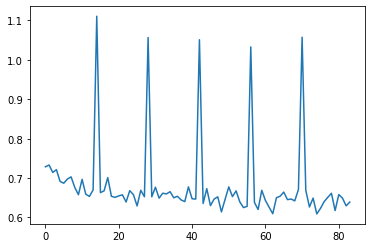

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
torch.save(model.state_dict(), "model_after_train.pt")

plt.plot(all_losses)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
total = len(validate_data)
y_pred=[]
y_true=[]
number_right = 0
model.eval()
with torch.no_grad():
    for idx, row in validate_data.iterrows():
        text_parts = preprocess_text(str(row['FULL_NEWS']))
        label = torch.tensor([row['TRUTH']]).float().to(device)
        
        overall_output = torch.zeros((1,2)).to(device)
        try:
            for part in text_parts:
                if len(part) > 0:
                    overall_output += model(part.reshape(1, -1))[0]
        except RuntimeError:
            print("GPU out of memory, skipping this entry.")
            continue
            
        overall_output = F.softmax(overall_output[0], dim=-1)
            
        result = overall_output.max(0)[1].float().item()
        y_pred.append(result)
        y_true.append(label.item())

        if result == label.item():
            number_right += 1
        #else :
        #    print(row)
        #    print('WRONG')
        if idx % print_every == 0 and idx > 0:
            print("{}/{}. Current accuracy: {}".format(idx, total, number_right / idx))



            
print("Accuracy on test data: {}".format(number_right / total))
print(confusion_matrix(y_true,y_pred))

31500/25378. Current accuracy: 0.011365079365079364
32000/25378. Current accuracy: 0.0228125
32500/25378. Current accuracy: 0.03310769230769231
33000/25378. Current accuracy: 0.04375757575757576
33500/25378. Current accuracy: 0.05408955223880597
34000/25378. Current accuracy: 0.06476470588235295
34500/25378. Current accuracy: 0.07556521739130435
35000/25378. Current accuracy: 0.08531428571428572
35500/25378. Current accuracy: 0.09538028169014084
36000/25378. Current accuracy: 0.10491666666666667
36500/25378. Current accuracy: 0.11336986301369863
37000/25378. Current accuracy: 0.12175675675675676
37500/25378. Current accuracy: 0.12986666666666666
38000/25378. Current accuracy: 0.1383421052631579
38500/25378. Current accuracy: 0.14675324675324675
39000/25378. Current accuracy: 0.15415384615384614
39500/25378. Current accuracy: 0.16159493670886077
40000/25378. Current accuracy: 0.1691
40500/25378. Current accuracy: 0.1765432098765432
41000/25378. Current accuracy: 0.18382926829268292
4150

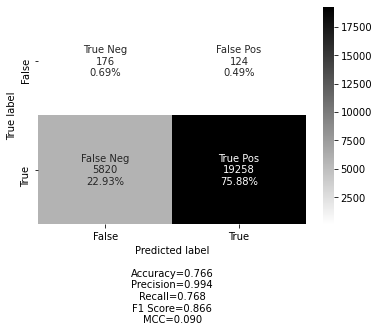

In [ ]:
#Doğruları labellamak önemliyse
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['False', 'True']
make_confusion_matrix(confusion_matrix(y_true,y_pred), 
                      y_pred,
                      y_true,
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

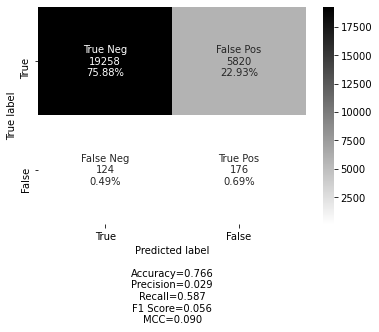

In [ ]:
#Yanlışları labellamak önemliyse (Haber fakeyse, fake olması positif)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['True', 'False']
make_confusion_matrix(confusion_matrix(y_true,y_pred,labels=[1,0]), 
                      y_pred,
                      y_true,
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [ ]:
total = len(test_data)
number_right = 0
model.eval()
with torch.no_grad():
    for idx, row in test_data.iterrows():
        text_parts = preprocess_text(str(row['FULL_NEWS']))
        label = torch.tensor([row['TRUTH']]).float().to(device)
        
        overall_output = torch.zeros((1,2)).to(device)
        try:
            for part in text_parts:
                if len(part) > 0:
                    overall_output += model(part.reshape(1, -1))[0]
        except RuntimeError:
            print("GPU out of memory, skipping this entry.")
            continue
            
        overall_output = F.softmax(overall_output[0], dim=-1)
            
        result = overall_output.max(0)[1].float().item()
 
        if result == label.item():
            number_right += 1
        else :
            print(row)
            print('WRONG')
        if idx % print_every == 0 and idx > 0:
            print("{}/{}. Current accuracy: {}".format(idx, total, number_right / idx))
            
print("Accuracy on test data: {}".format(number_right / total))

In [ ]:
def test(text):
    text_parts = preprocess_text(text)
    overall_output = torch.zeros((1,2)).to(device)
    try:
        for part in text_parts:
            if len(part) > 0:
                overall_output += model(part.reshape(1, -1))[0]
    except RuntimeError:
        print("GPU out of memory, skipping this entry.")

    overall_output = F.softmax(overall_output[0], dim=-1)

    value, result = overall_output.max(0)

    term = "fake"
    if result.item() == 0:
        term = "real"

    print("{} at {}%".format(term, value.item() * 100))

In [ ]:
import torch
from torch.nn.functional import softmax

import matplotlib
import matplotlib.pyplot as plt


class SaliencyInterpreter:
    def __init__(self,
                 model,
                 criterion,
                 tokenizer,
                 show_progress=True,
                 **kwargs):

        """
        :param model: nn.Module object - can be HuggingFace's model or custom one.
        :param criterion: torch criterion used to train your model.
        :param tokenizer: HuggingFace's tokenizer.
        :param show_progress: bool flag to show tqdm progress bar.
        :param kwargs:
            encoder: string indicates the HuggingFace's encoder, that has 'embeddings' attribute. Used
                if your model doesn't have 'get_input_embeddings' method to get access to encoder embeddings
        """

        #self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.device = torch.device('cuda')
        self.model = model.to(device)
        self.model.eval()
        self.criterion = criterion
        self.tokenizer = tokenizer
        self.show_progress = show_progress
        self.kwargs = kwargs
        # to save outputs in saliency_interpret
        self.batch_output = None

    def _get_gradients(self, batch):
        # set requires_grad to true for all parameters, but save original values to
        # restore them later
        original_param_name_to_requires_grad_dict = {}
        for param_name, param in self.model.named_parameters():
            original_param_name_to_requires_grad_dict[param_name] = param.requires_grad
            param.requires_grad = True
        embedding_gradients = []
        hooks = self._register_embedding_gradient_hooks(embedding_gradients)

        loss = self.forward_step(batch)

        self.model.zero_grad()
        loss.backward()

        for hook in hooks:
            hook.remove()

        # restore the original requires_grad values of the parameters
        for param_name, param in self.model.named_parameters():
            param.requires_grad = original_param_name_to_requires_grad_dict[param_name]

        return embedding_gradients[0]

    def _register_embedding_gradient_hooks(self, embedding_gradients):
        """
        Registers a backward hook on the
        Used to save the gradients of the embeddings for use in get_gradients()
        When there are multiple inputs (e.g., a passage and question), the hook
        will be called multiple times. We append all the embeddings gradients
        to a list.
        """

        def hook_layers(module, grad_in, grad_out):
            embedding_gradients.append(grad_out[0])

        backward_hooks = []
        embedding_layer = self.get_embeddings_layer()
        backward_hooks.append(embedding_layer.register_backward_hook(hook_layers))
        return backward_hooks

    def get_embeddings_layer(self):
        if hasattr(self.model, "get_input_embeddings"):
            embedding_layer = self.model.get_input_embeddings()
        else:
            encoder_attribute = self.kwargs.get("encoder")
            assert encoder_attribute, "Your model doesn't have 'get_input_embeddings' method, thus you " \
                "have provide 'encoder' key argument while initializing SaliencyInterpreter object"
            embedding_layer = getattr(self.model, encoder_attribute).embeddings
        return embedding_layer

    def colorize(self, instance, skip_special_tokens=False):

        special_tokens = self.special_tokens

        word_cmap = matplotlib.cm.Blues
        prob_cmap = matplotlib.cm.Greens
        template = '<span class="barcode"; style="color: black; background-color: {}">{}</span>'
        colored_string = ''
        # Use a matplotlib normalizer in order to make clearer the difference between values
        normalized_and_mapped = matplotlib.cm.ScalarMappable(cmap=word_cmap).to_rgba(instance['grad'])
        for word, color in zip(instance['tokens'], normalized_and_mapped):
            if word in special_tokens and skip_special_tokens:
                continue
            # handle wordpieces
            word = word.replace("##", "") if "##" in word else ' ' + word
            color = matplotlib.colors.rgb2hex(color[:3])
            colored_string += template.format(color, word)
        colored_string += template.format(0, "    Label: {} |".format(instance['label']))
        prob = instance['prob']
        color = matplotlib.colors.rgb2hex(prob_cmap(prob)[:3])
        colored_string += template.format(color, "{:.2f}%".format(instance['prob']*100)) + '|'
        return colored_string

    @property
    def special_tokens(self):
        """
        Some tokenizers don't have 'eos_token' and 'bos_token' attributes.
        So needed we some trick to get them.
        """
        if self.tokenizer.bos_token is None or self.tokenizer.eos_token is None:
            special_tokens = self.tokenizer.build_inputs_with_special_tokens([])
            special_tokens_ids = self.tokenizer.convert_ids_to_tokens(special_tokens)
            self.tokenizer.bos_token, self.tokenizer.eos_token = special_tokens_ids

        special_tokens = self.tokenizer.eos_token, self.tokenizer.bos_token
        return special_tokens

    def forward_step(self, batch):
         """
         If your model receive inputs in another way or you computing not
         like in this example simply override this method. It should return the batch loss
         :param batch: batch returned by dataloader
         :return: torch.Tensor: batch loss
         """
         
         text_parts = preprocess_text(str(row['FULL_NEWS']))
         label = torch.tensor([row['TRUTH']]).long().to(device)
         overall_outputx = torch.zeros((1, 2)).float().to(device)
    

         for part in text_parts:
          if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)
                # print(input.shape)
                overall_outputx += model(input, labels=label)[1].float().to(device)
                
            except Exception as e:
                print(str(e))

         #     overall_output /= len(text_parts)
         overall_output = F.softmax(overall_outputx[0], dim=-1)

         if label == 0:
          label = torch.tensor([1.0, 0.0]).float().to(device)
         elif label == 1:
          label = torch.tensor([0.0, 1.0]).float().to(device)

         # print(overall_output, label)

         loss = criterion(overall_output, label)

         self.batch_output = [input, overall_outputx]

         return loss

    def update_output(self):
        """
        You can also override this method if you want to change the format
         of outputs. (e.g. store just gradients)
        :return: batch_output
        """

        input_ids, outputs, grads = self.batch_output

        probs = softmax(outputs, dim=-1)
        probs, labels = torch.max(probs, dim=-1)

        tokens = [
            self.tokenizer.convert_ids_to_tokens(input_ids_)
            for input_ids_ in input_ids
        ]

        embedding_grads = grads.sum(dim=2)
        # norm for each sequence
        norms = torch.norm(embedding_grads, dim=1, p=1)
        # normalizing
        for i, norm in enumerate(norms):
            embedding_grads[i] = torch.abs(embedding_grads[i]) / norm

        batch_output = []

        iterator = zip(tokens, probs, embedding_grads, labels)

        for example_tokens, example_prob, example_grad, example_label in iterator:
            example_dict = dict()
            # as we do it by batches we has a padding so we need to remove it
            example_tokens = [t for t in example_tokens if (t != self.tokenizer.pad_token or t != self.tokenizer.cls_token or t != self.tokenizer.sep_token)]
            example_dict['tokens'] = example_tokens
            example_dict['grad'] = example_grad.cpu().tolist()[:len(example_tokens)]
            example_dict['label'] = example_label.item()
            example_dict['prob'] = example_prob.item()
            batch_output.append(example_dict)
        return batch_output

In [ ]:
import numpy as np
from tqdm import tqdm


class IntegratedGradient(SaliencyInterpreter):
    """
    Interprets the prediction using Integrated Gradients (https://arxiv.org/abs/1703.01365)
    Registered as a `SaliencyInterpreter` with name "integrated-gradient".
    """
    def __init__(self,
                 model,
                 criterion,
                 tokenizer,
                 num_steps=40,
                 show_progress=True,
                 **kwargs):
        super().__init__(model, criterion, tokenizer, show_progress, **kwargs)
        # Hyperparameters
        self.num_steps = num_steps

    def saliency_interpret(self, test_dataloader):

        instances_with_grads = []
        iterator = tqdm(test_dataloader) if self.show_progress else test_dataloader

        for batch in iterator:

            # we will store there batch outputs such as gradients, probability, tokens
            # so as each of them are used in different places, for convenience we will create
            # it as attribute:
            self.batch_output = []
            self._integrate_gradients(batch)
            batch_output = self.update_output()
            instances_with_grads.extend(batch_output)

        return instances_with_grads

    def _register_forward_hook(self, alpha, embeddings_list):
        """
        Register a forward hook on the embedding layer which scales the embeddings by alpha. Used
        for one term in the Integrated Gradients sum.
        We store the embedding output into the embeddings_list when alpha is zero.  This is used
        later to element-wise multiply the input by the averaged gradients.
        """

        def forward_hook(module, inputs, output):
            # Save the input for later use. Only do so on first call.
            if alpha == 0:
                embeddings_list.append(output.squeeze(0).clone().detach())

            # Scale the embedding by alpha
            output.mul_(alpha)

        embedding_layer = self.get_embeddings_layer()
        handle = embedding_layer.register_forward_hook(forward_hook)
        return handle

    def _integrate_gradients(self, batch):

        ig_grads = None

        # List of Embedding inputs
        embeddings_list = []

        # Exclude the endpoint because we do a left point integral approximation
        for alpha in np.linspace(0, 1.0, num=self.num_steps, endpoint=False):
            # Hook for modifying embedding value
            handle = self._register_forward_hook(alpha, embeddings_list)

            grads = self._get_gradients(batch)
            handle.remove()

            # Running sum of gradients
            if ig_grads is None:
                ig_grads = grads
            else:
                ig_grads = ig_grads + grads

        # Average of each gradient term
        ig_grads /= self.num_steps

        # Gradients come back in the reverse order that they were sent into the network
        embeddings_list.reverse()

        # Element-wise multiply average gradient by the input
        ig_grads *= embeddings_list[0]

        self.batch_output.append(ig_grads)


In [ ]:
import torch

from tqdm import tqdm



class SmoothGradient(SaliencyInterpreter):
    """
    Interprets the prediction using SmoothGrad (https://arxiv.org/abs/1706.03825)
    Registered as a `SaliencyInterpreter` with name "smooth-gradient".
    """
    def __init__(self,
                 model,
                 criterion,
                 tokenizer,
                 stdev=0.01,
                 num_samples=20,
                 show_progress=True,
                 **kwargs):
        super().__init__(model, criterion, tokenizer, show_progress, **kwargs)
        # Hyperparameters
        self.stdev = stdev
        self.num_samples = num_samples

    def saliency_interpret(self, test_dataloader):

        instances_with_grads = []
        iterator = tqdm(test_dataloader) if self.show_progress else test_dataloader

        for batch in iterator:

            # we will store there batch outputs such as gradients, probability, tokens
            # so as each of them are used in different places, for convenience we will create
            # it as attribute:
            self.batch_output = []
            self._smooth_grads(batch)
            batch_output = self.update_output()
            instances_with_grads.extend(batch_output)

        return instances_with_grads

    def _register_forward_hook(self, stdev: float):
        """
        Register a forward hook on the embedding layer which adds random noise to every embedding.
        Used for one term in the SmoothGrad sum.
        """

        def forward_hook(module, inputs, output):
            # Random noise = N(0, stdev * (max-min))
            scale = output.detach().max() - output.detach().min()
            noise = torch.randn(output.shape).to(output.device) * stdev * scale

            # Add the random noise
            output.add_(noise)

        # Register the hook
        embedding_layer = self.get_embeddings_layer()
        handle = embedding_layer.register_forward_hook(forward_hook)
        return handle

    def _smooth_grads(self, batch):
        total_gradients = None
        for _ in range(self.num_samples):
            handle = self._register_forward_hook(self.stdev)
            grads = self._get_gradients(batch)
            handle.remove()

            # Sum gradients
            if total_gradients is None:
                total_gradients = grads
            else:
                total_gradients = total_gradients + grads

        total_gradients /= self.num_samples

        self.batch_output.append(total_gradients)

In [ ]:
from torch.utils.data import DataLoader
from IPython.display import display, HTML

In [ ]:
integrated_grad = IntegratedGradient(
    model, 
    criterion, 
    tokenizer, 
    show_progress=False,
    encoder="bert"
)

In [ ]:
 inst_list=[]
 for idx, row in validate_data.iterrows():
        text_parts = preprocess_text(str(row['FULL_NEWS']))
        label = torch.tensor([row['TRUTH']]).float().to(device)
        for part in text_parts:
          if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)

                batch_size=1
                test_dataloader = DataLoader(
                input,
                batch_size=batch_size,
                shuffle=False,
                )
                
            except Exception as e:
                print(str(e))
          instances = integrated_grad.saliency_interpret(test_dataloader)    
          inst_list.append(instances)

In [ ]:
lexicon_list=[]
for i in range(len(inst_list)):
  arr = np.array(inst_list[i][0]['grad'])
  arr.argsort()[-3:][::-1]
  for item in arr.argsort()[-4:][::-1]:
    if inst_list[i][0]['tokens'][item].find("#")==0:
      if (inst_list[i][0]['tokens'][item-1]+inst_list[i][0]['tokens'][item]).find("#")==0:
        if (inst_list[i][0]['tokens'][item-2]+inst_list[i][0]['tokens'][item-1]+inst_list[i][0]['tokens'][item]).find("#")==0:
          lexicon_list.append((inst_list[i][0]['tokens'][item-3]+inst_list[i][0]['tokens'][item-2]+inst_list[i][0]['tokens'][item-1]+inst_list[i][0]['tokens'][item]).replace("#",""))
        else:
          lexicon_list.append((inst_list[i][0]['tokens'][item-2]+inst_list[i][0]['tokens'][item-1]+inst_list[i][0]['tokens'][item]).replace("#",""))
      else:
        lexicon_list.append((inst_list[i][0]['tokens'][item-1]+inst_list[i][0]['tokens'][item]).replace("#",""))
    else:
      lexicon_list.append(inst_list[i][0]['tokens'][item])

In [ ]:
from collections import Counter
Counter(lexicon_list).most_common()

[]

In [ ]:
lexicon_set = set(lexicon_list)

In [ ]:
lexicon_set

set()

In [ ]:
coloder_string = integrated_grad.colorize(inst_list[1][0])
display(HTML(coloder_string))